# Fluxo de trabalho do Azure Databricks

## Ingerindo dados

Inicialmente utilizei comandos de shell para baixar arquivos de dados do GitHub para o sistema de arquivos usado pelo meu cluster.

In [ ]:
 %sh
 rm -r /dbfs/workflow_lab
 mkdir /dbfs/workflow_lab
 wget -O /dbfs/workflow_lab/2019.csv https://github.com/MicrosoftLearning/mslearn-databricks/raw/main/data/2019_edited.csv
 wget -O /dbfs/workflow_lab/2020.csv https://github.com/MicrosoftLearning/mslearn-databricks/raw/main/data/2020_edited.csv
 wget -O /dbfs/workflow_lab/2021.csv https://github.com/MicrosoftLearning/mslearn-databricks/raw/main/data/2021_edited.csv

## Criando uma tarefa de trabalho

Executei o seguinte código, em um notebook chamado 'ETL task', que define um esquema para os dados e carrega os conjuntos de dados em um dataframe:

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
orderSchema = StructType([
     StructField("SalesOrderNumber", StringType()),
     StructField("SalesOrderLineNumber", IntegerType()),
     StructField("OrderDate", DateType()),
     StructField("CustomerName", StringType()),
     StructField("Email", StringType()),
     StructField("Item", StringType()),
     StructField("Quantity", IntegerType()),
     StructField("UnitPrice", FloatType()),
     StructField("Tax", FloatType())
])
df = spark.read.load('/workflow_lab/*.csv', format='csv', schema=orderSchema)
display(df.limit(100))

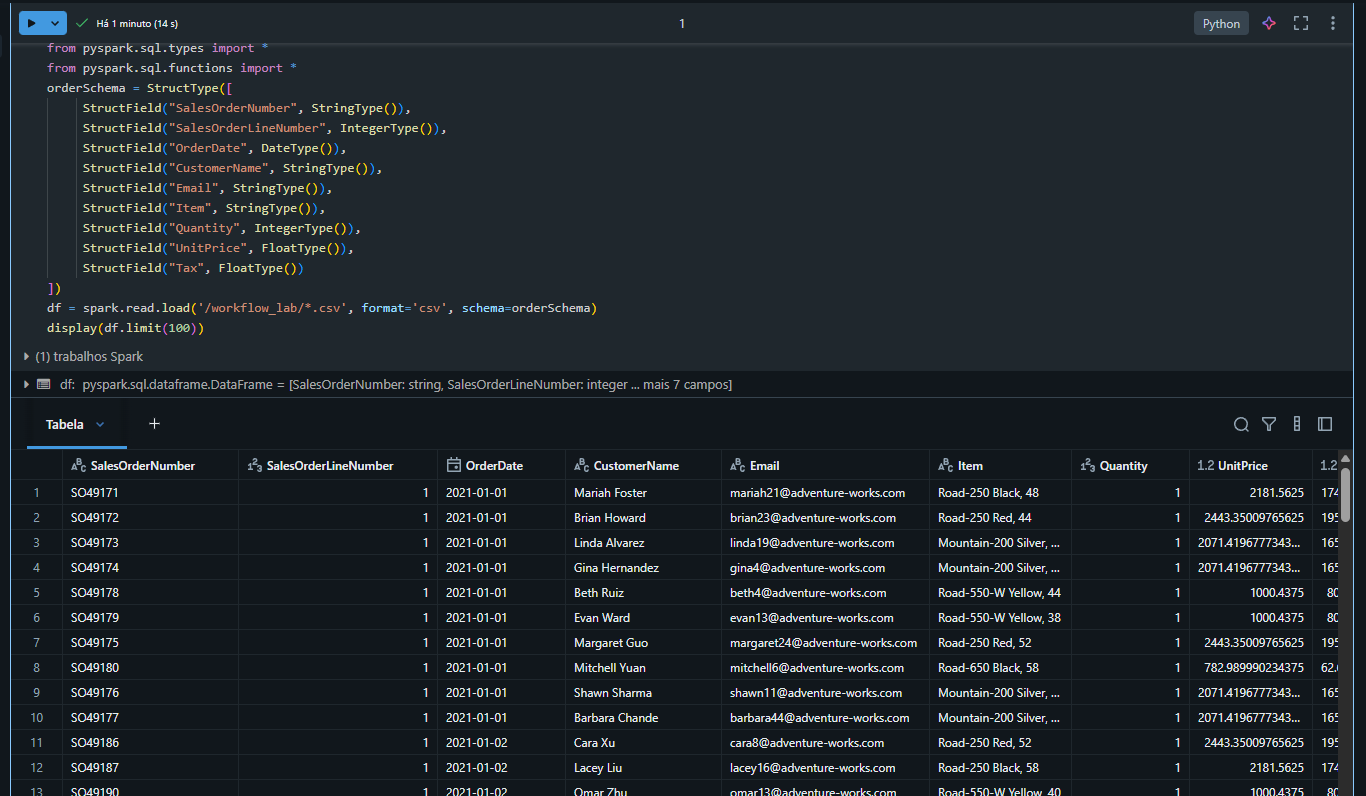

Em seguida, inseri e execute o seguinte código para remover linhas duplicadas e substituir as entradas nulas pelos valores corretos:

In [ ]:
 from pyspark.sql.functions import col
 df = df.dropDuplicates()
 df = df.withColumn('Tax', col('UnitPrice') * 0.08)
 df = df.withColumn('Tax', col('Tax').cast("float"))

Em seguida, executei o seguinte código para agregar e agrupar os dados do pedido:

In [ ]:
yearlySales = df.select(year("OrderDate").alias("Year")).groupBy("Year").count().orderBy("Year")
display(yearlySales)

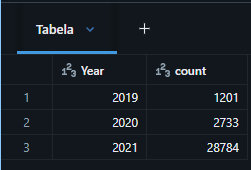

## Criando o fluxo de trabalho

Inicialmente criei um Job com nome 'ETL job', com as seguintes configurações:

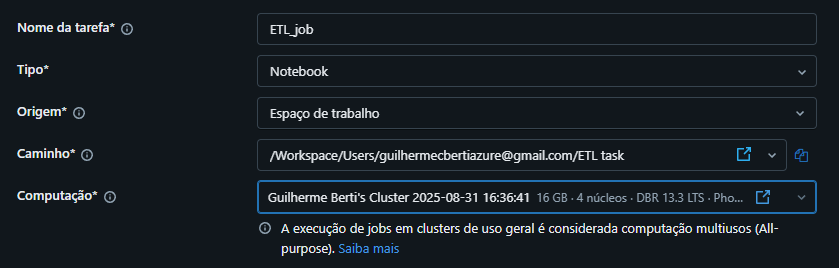

Criei, executei e verifiquei a execução:

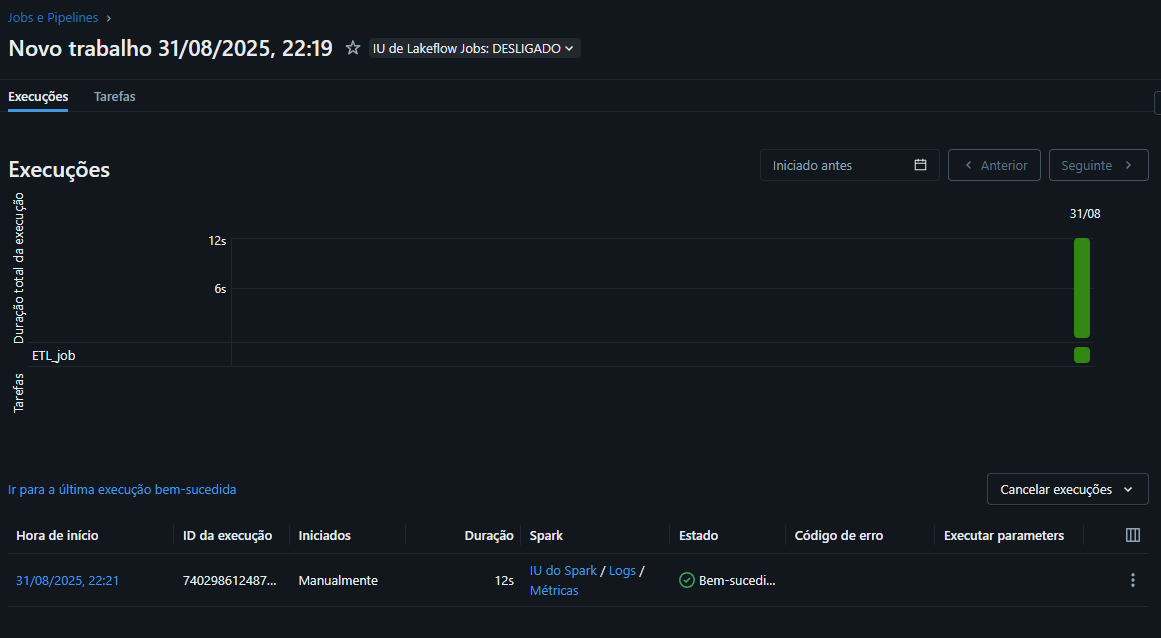